<a href="https://colab.research.google.com/github/maskboyAvi/AdobeGensolve/blob/main/perfect_shape_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:

df= pd.read_csv('frag0.csv')

In [ ]:
df.columns


Index(['0.000000000000000000e+00', '0.000000000000000000e+00.1',
       '4.194200134277343750e+01', '6.898000335693359375e+01'],
      dtype='object')

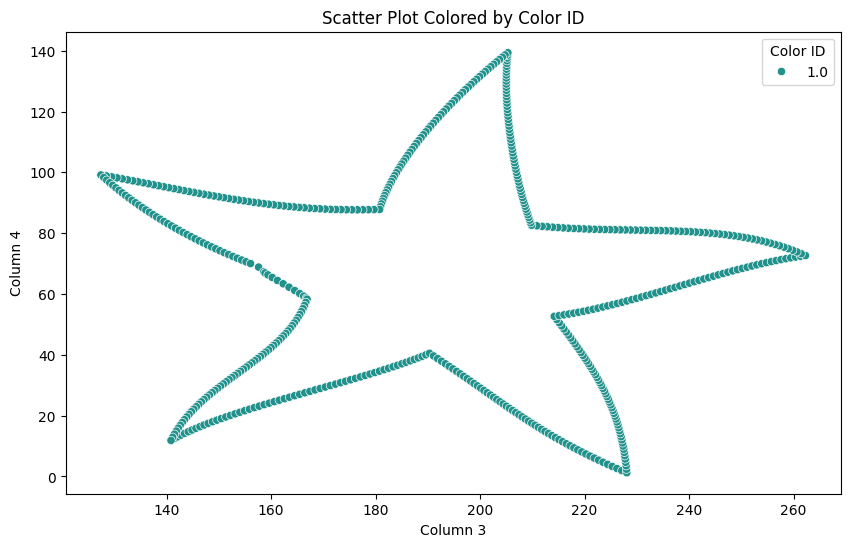

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('star.csv')

# Set up the plot
plt.figure(figsize=(10, 6))

# Use seaborn scatterplot to color points by the first column (color ID)
scatter = sns.scatterplot(
    data=df,
    x=df.columns[2],
    y=df.columns[3],
    hue=df.columns[0],
    palette='viridis',
    legend='full'
)

# Add labels and title
plt.xlabel('Column 3')
plt.ylabel('Column 4')
plt.title('Scatter Plot Colored by Color ID')
plt.legend(title='Color ID')

# Display the plot
plt.show()


In [ ]:

import pandas as pd

# Load the CSV file
file_path = 'star.csv'
df = pd.read_csv(file_path)

# Remove rows with ID 3
df_filtered = df[df[df.columns[0]] != 0]

# Save the filtered dataframe to a new CSV file
filtered_file_path = 'star.csv'
df_filtered.to_csv(filtered_file_path, index=False)

print(f'Filtered data saved to {filtered_file_path}')


Filtered data saved to star.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

# Load the CSV file
file_path = 'circ1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Extract x and y coordinates (assuming the last two columns are x and y)
coordinates = data.iloc[:, -2:].values

# Define a distance threshold to consider two nodes as connected
distance_threshold = 2.0  # Adjust this value based on your needs

# Function to get neighbors in 8 directions
def get_neighbors(node, coordinates, threshold):
    neighbors = []
    for i in range(len(coordinates)):
        if i != node and np.linalg.norm(coordinates[node] - coordinates[i]) <= threshold:
            neighbors.append(i)
    return neighbors

# Function to perform BFS and find connected components
def bfs(node, visited, coordinates, threshold):
    component = []
    queue = deque([node])
    visited[node] = True

    while queue:
        current_node = queue.popleft()
        component.append(current_node)

        for neighbor in get_neighbors(current_node, coordinates, threshold):
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append(neighbor)

    return component

# Find all connected components
visited = [False] * len(coordinates)
components = []
for node in range(len(coordinates)):
    if not visited[node]:
        component = bfs(node, visited, coordinates, distance_threshold)
        components.append(component)

print(len(components))




1761


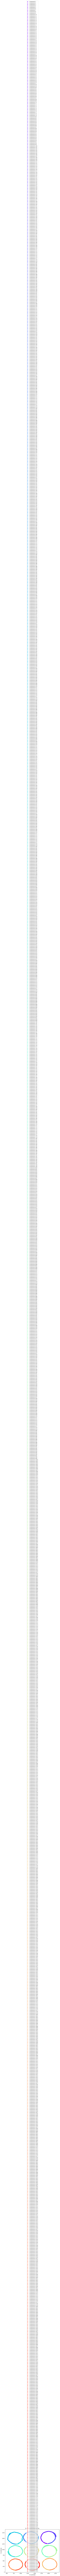

In [ ]:

# Plot the components'
colors = plt.cm.rainbow(np.linspace(0, 1, len(components)))
plt.figure(figsize=(10, 8))
for i, component in enumerate(components):
    component_coords = coordinates[component]
    plt.scatter(component_coords[:, 0], component_coords[:, 1], color=colors[i], label=f'Component {i+1}')

# Draw labels and legend
plt.legend()
plt.title('Connected Components')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

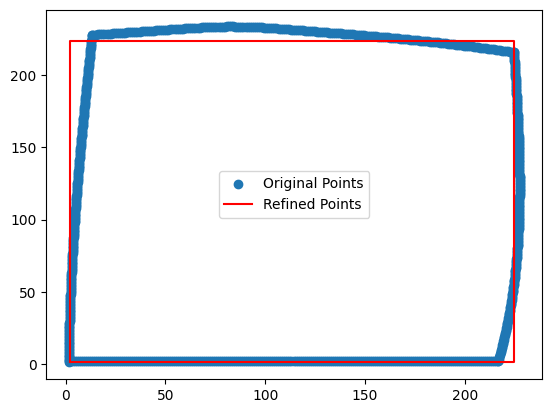

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Function to read the CSV file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    x = data.iloc[:, -2].values
    y = data.iloc[:, -1].values
    return x, y

# Function to save the refined points to a new CSV file
def save_csv(x, y, file_path):
    df = pd.DataFrame({'x': x, 'y': y})
    df.to_csv(file_path, index=False)

# Function to calculate the centroid of points
def calculate_centroid(x, y):
    return np.mean(x), np.mean(y)

# Function to calculate the side length of the square based on area
def calculate_side_length(area):
    return np.sqrt(area)

# Function to generate points for a perfect square centered at (cx, cy)
def generate_square_points(cx, cy, side_length):
    half_side = side_length / 2
    square_x = [cx - half_side, cx + half_side, cx + half_side, cx - half_side]
    square_y = [cy - half_side, cy - half_side, cy + half_side, cy + half_side]
    return np.array(square_x), np.array(square_y)

# Function to calculate the area of a polygon given its vertices
def calculate_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Function to refine points to match a perfect square
def refine_points_to_square(x, y):
    # Calculate the centroid of the original points
    cx, cy = calculate_centroid(x, y)

    # Calculate the area of the original shape
    area = calculate_area(x, y)

    # Calculate the side length of the square
    side_length = calculate_side_length(area)

    # Generate perfect square points
    square_x, square_y = generate_square_points(cx, cy, side_length)

    return square_x, square_y

# Main function to process the CSV file
def process_csv(input_file, output_file):
    x, y = read_csv(input_file)

    # Plot the original points
    plt.scatter(x, y, label='Original Points')

    x_refined, y_refined = refine_points_to_square(x, y)

    # Plot the refined points
    plt.plot(np.append(x_refined, x_refined[0]), np.append(y_refined, y_refined[0]), color='red', label='Refined Points')
    plt.legend()
    plt.show()

    save_csv(x_refined, y_refined, output_file)

# Example usage
input_file = 'frag0.csv'  # Path to the input CSV file
output_file = 'output.csv'  # Path to save the output CSV file

# Process the CSV file
process_csv(input_file, output_file)


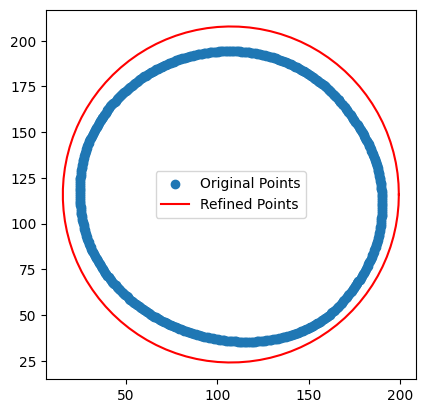

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read the CSV file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    x = data.iloc[:, -2].values
    y = data.iloc[:, -1].values
    return x, y

# Function to save the refined points to a new CSV file
def save_csv(x, y, file_path):
    df = pd.DataFrame({'x': x, 'y': y})
    df.to_csv(file_path, index=False)

# Function to calculate the centroid of points
def calculate_centroid(x, y):
    return np.mean(x), np.mean(y)

# Function to calculate the radius of the circle based on area
def calculate_radius(area):
    return np.sqrt(area / np.pi)

# Function to calculate the area of a polygon given its vertices
def calculate_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Function to generate points for a perfect circle centered at (cx, cy)
def generate_circle_points(cx, cy, radius, num_points=100):
    angles = np.linspace(0, 2 * np.pi, num_points)
    circle_x = cx + radius * np.cos(angles)
    circle_y = cy + radius * np.sin(angles)
    return circle_x, circle_y

# Function to refine points to match a perfect circle
def refine_points_to_circle(x, y):
    # Calculate the centroid of the original points
    cx, cy = calculate_centroid(x, y)

    # Calculate the area of the original shape
    area = calculate_area(x, y)

    # Calculate the radius of the circle
    radius = calculate_radius(area)

    # Generate perfect circle points
    circle_x, circle_y = generate_circle_points(cx, cy, radius)

    return circle_x, circle_y

# Main function to process the CSV file
def process_csv(input_file, output_file):
    x, y = read_csv(input_file)

    # Plot the original points
    plt.scatter(x, y, label='Original Points')

    x_refined, y_refined = refine_points_to_circle(x, y)

    # Plot the refined points
    plt.plot(x_refined, y_refined, color='red', label='Refined Points')
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    save_csv(x_refined, y_refined, output_file)

# Example usage
input_file = 'frag0_circle.csv'  # Path to the input CSV file
output_file = 'output_circle.csv'  # Path to save the output CSV file

# Process the CSV file
process_csv(input_file, output_file)


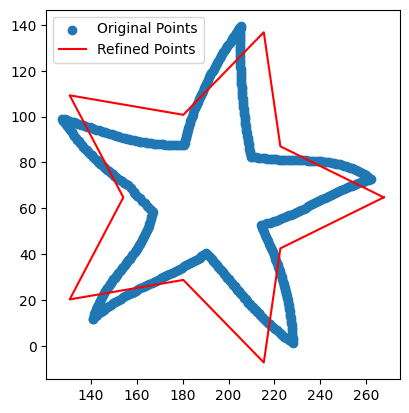

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read the CSV file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    x = data.iloc[:, -2].values
    y = data.iloc[:, -1].values
    return x, y

# Function to save the refined points to a new CSV file
def save_csv(x, y, file_path):
    df = pd.DataFrame({'x': x, 'y': y})
    df.to_csv(file_path, index=False)

# Function to calculate the centroid of points
def calculate_centroid(x, y):
    return np.mean(x), np.mean(y)

# Function to generate points for a perfect star centered at (cx, cy)
def generate_star_points(cx, cy, radius, num_points=5):
    angles = np.linspace(0, 2 * np.pi, 2 * num_points + 1)
    points_x = []
    points_y = []
    for i, angle in enumerate(angles):
        if i % 2 == 0:
            points_x.append(cx + radius * np.cos(angle))
            points_y.append(cy + radius * np.sin(angle))
        else:
            points_x.append(cx + (radius / 2) * np.cos(angle))
            points_y.append(cy + (radius / 2) * np.sin(angle))
    return np.array(points_x), np.array(points_y)

# Main function to process the CSV file
def process_csv(input_file, output_file):
    x, y = read_csv(input_file)

    # Plot the original points
    plt.scatter(x, y, label='Original Points')

    # Calculate the centroid of the original points
    cx, cy = calculate_centroid(x, y)

    # Assume a radius that maintains the original scale (e.g., the maximum distance from the centroid)
    radius = np.max(np.sqrt((x - cx)**2 + (y - cy)**2))

    # Generate star points
    x_refined, y_refined = generate_star_points(cx, cy, radius, num_points=5)

    # Plot the refined points
    plt.plot(np.append(x_refined, x_refined[0]), np.append(y_refined, y_refined[0]), color='red', label='Refined Points')
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    save_csv(x_refined, y_refined, output_file)

# Example usage
input_file = 'star.csv'  # Path to the input CSV file
output_file = 'output_star.csv'  # Path to save the output CSV file

# Process the CSV file
process_csv(input_file, output_file)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to read the CSV file
def read_csv(file_path):
    data = pd.read_csv(file_path)
    x = data.iloc[:, -2].values
    y = data.iloc[:, -1].values
    return x, y

# Function to save the refined points to a new CSV file
def save_csv(x, y, file_path):
    df = pd.DataFrame({'x': x, 'y': y})
    df.to_csv(file_path, index=False)

# Function to calculate the centroid of points
def calculate_centroid(x, y):
    return np.mean(x), np.mean(y)

# Function to calculate the area of a polygon given its vertices
def calculate_area(x, y):
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

# Function to generate points for a perfect rectangle centered at (cx, cy)
def generate_rectangle_points(cx, cy, width, height):
    half_width = width / 2
    half_height = height / 2
    rectangle_x = [cx - half_width, cx + half_width, cx + half_width, cx - half_width]
    rectangle_y = [cy - half_height, cy - half_height, cy + half_height, cy + half_height]
    return np.array(rectangle_x), np.array(rectangle_y)

# Function to calculate the side lengths of the rectangle based on area
def calculate_side_lengths(area, aspect_ratio):
    width = np.sqrt(area * aspect_ratio)
    height = area / width
    return width, height

# Main function to process the CSV file
def process_csv(input_file, output_file, aspect_ratio=1):
    x, y = read_csv(input_file)

    # Plot the original points
    plt.scatter(x, y, label='Original Points')

    # Calculate the centroid of the original points
    cx, cy = calculate_centroid(x, y)

    # Calculate the area of the original shape
    area = calculate_area(x, y)

    # Calculate the side lengths of the rectangle
    width, height = calculate_side_lengths(area, aspect_ratio)

    # Generate rectangle points
    x_refined, y_refined = generate_rectangle_points(cx, cy, width, height)

    # Plot the refined points
    plt.plot(np.append(x_refined, x_refined[0]), np.append(y_refined, y_refined[0]), color='red', label='Refined Points')
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    save_csv(x_refined, y_refined, output_file)

# Example usage
input_file = '/mnt/data/frag0_rectangle.csv'  # Path to the input CSV file
output_file = '/mnt/data/output_rectangle.csv'  # Path to save the output CSV file

# Process the CSV file with an aspect ratio of 1 (square)
process_csv(input_file, output_file, aspect_ratio=1)
